<a href="https://colab.research.google.com/github/skytmddus27/president_election/blob/master/220508_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치

In [1]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [787 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

In [1]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-05-24 10:58:51--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-05-24 10:58:52--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc74d5f02005d8e16f10ac93b49f.dl.dropboxusercontent.com/cd/0/get/Bl3emqzS7Yr4iKbHJqPuvYWye65nCbxaWWEnQ3C7slSj_bWkLGYbxKVlgGIgBZ6N17AvpeQLhZ2kSL8Uo3OePwyoLIKfiLJJxrIHq_lXBYCW5d5_5wYHW97OJYeLEvBFCPV4gaqO1SUwlSrbNSwcqYP5KIRVl0WaICVozfhGqtf-JnL8JPM6dBhP3HkHgsEMVIc/file?dl=1# [following]
--2022-05-24 10:58:52--  https://uc74d5f02005d8e16f10ac93b49f.dl.dropboxusercontent.com/cd/0/ge

In [2]:
!pip install --upgrade plotly
!pip install konlpy
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 4.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 647 kB 4.3 MB/s 
     |████████████████████████████████| 281 kB 45.6 MB/s 
     |████████████████████████████████| 140 kB 42.2 MB/s 
  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13078 sha256=fe24332b2e46894a190c292aac2216018a9f45e88469785516a86ccef2c895e4
  Stored in directory: /root/.cache/pip/wheels/e8/1a/1b/46aa7b0fac16d3ce1bccaac14bfe4fad972642217ae78d8160
Successfully built swifter
  Attempting uninstall: psutil
   

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'NanumBarunGothic')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import seaborn as sns

from wordcloud import WordCloud
from konlpy.tag import Okt
from konlpy.tag import Twitter
import re

from datetime import datetime
from tqdm import tqdm
import swifter
from konlpy.tag import Kkma, Komoran, Mecab

# 데이터 불러오기

In [6]:
park = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/park_pred.csv')
fire = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/fire_pred.csv')
ahn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_pred.csv')
number = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/number_pred.csv')

# 전처리

In [7]:
def CleanText(readData, Num=False, Eng=False):

    # Remove Retweets RT @user_screenname 
    text = re.sub('RT @[\w_]+: ', '', readData)
    text = re.sub('알티', '', text)

    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)

    # Remove or Replace URL 
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url

    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)

    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    
    # Remove newline
    text = text.replace('\n',' ')
    
    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+',' ',text)
    
    if Eng is True:
        # Remove English 
        text = re.sub('[a-zA-Z]' , ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())
       
    return text

In [8]:
ahn['Text'] = ahn['Text'].apply(lambda x: CleanText(str(x)))
ahn = ahn.dropna()

# 시각화

## 긍부정

In [ ]:
plt.figure(figsize=(10,6))

# label = ['negative','positive']
# x = np.arange(len(label))
# plt.bar(x, number.pred)
# sns.color_palette('coolwarm', 2)

g = sns.countplot(x='pred', data=number, palette = 'RdBu')
g.set_xticklabels(['negative', 'positive'])

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2., height + 0.5, height, ha = 'center', size = 9)

plt.title('Distribution of Pos and Neg [4번]')
plt.xlabel('label')

# plt.savefig('안철수_긍부정')

## wordcloud

In [9]:
def wc(data):
    okt = Okt()
    word_list = []
    word_list = data['Text'].dropna()

    sentences_tag = []
    for sentence in word_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)

    noun_list = []
    for sentence in sentences_tag:
        for word, tag in sentence:
            if tag in ['Noun']:
                noun_list.append(word)
    noun_list = [n for n in noun_list if len(n) > 1]
    counts = Counter(noun_list)
    tags = counts.most_common(1000)
    wordcloud = WordCloud('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/NANUMGOTHIC.TTF',
                          width = 1000, height = 1000)
    print(dict(tags))
    # tags 몇 번째부터 할 지 선택 (안철수 1, 박지현 1, 추적단 불꽃 2, 4번 0)
    cloud = wordcloud.generate_from_frequencies(dict(tags[3:]))
    plt.figure(figsize = (10, 10))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [ ]:
wc(ahn)

### 주차별

In [10]:
def date_week(data):
    data.Datetime = pd.to_datetime(data.Datetime)

    for i in range(1, 29):
        if i in range(10, 17):
            data.loc[data.Datetime.dt.day == i, 'week'] = 1
        elif i in range(17, 24):
            data.loc[data.Datetime.dt.day == i, 'week'] = 2
        elif i in range(3, 10):
            data.loc[data.Datetime.dt.day == i, 'week'] = 4
        else:
            data.loc[data.Datetime.dt.day == i, 'week'] = 3

In [ ]:
ahn[ahn.Text.str.contains('경찰', na=False)]

,Unnamed: 0,Datetime,Tweet Id,Text,pred,week
53,53,2022-03-09 03:40:20+00:00,1501402478817918982,진짜 박지현 때문에 뽑았음.. 추적단 불꽃 행적에 대해 쓴 책 &lt;우리가 우리를...,1,4.0
246,42,2022-03-02 02:40:53+00:00,1498850802135629826,N반방 주범 공범들 텔레그램측에 협조 얻어내 죄다 검거 해낸게 경찰 이었음불꽃 추적...,0,3.0
265,61,2022-02-28 09:31:19+00:00,1498229316093902853,조주빈 체포 과정 스토리불꽃 추적단 박지현 씨는 경찰에 신고한 후 경찰의 추적과 잠...,0,3.0


{'안철수': 14290, '후보': 3949, '윤석열': 3672, '일화': 3391, '이재명': 2366, '국민': 1787, '뉴스': 1578, '대선': 1464, '제안': 1135, '대통령': 1126, '정치': 1049, '사람': 956, '출처': 932, '다음': 776, '여론조사': 773, '심상정': 741, '정권': 732, '생각': 698, '토론': 658, '네이버': 645, '선거': 641, '교체': 631, '국민의당': 596, '지지': 542, '민주당': 522, '지지자': 489, '철수': 487, '완주': 483, '버스': 479, '지지율': 479, '지금': 478, '이준석': 474, '단일': 467, '경선': 434, '유세': 407, '국힘': 402, '오늘': 397, '사망': 374, '대한민국': 366, '이번': 363, '야권': 362, '코로나': 357, '김미경': 347, '사고': 334, '우리': 333, '방식': 324, '위해': 322, '당선': 314, '문재인': 301, '이제': 289, '교수': 284, '진짜': 278, '한국': 269, '나라': 268, '그냥': 267, '대표': 263, '선택': 261, '때문': 260, '미래': 258, '공약': 254, '부인': 251, '하나': 249, '투표': 244, '선거운동': 238, '이유': 233, '정부': 230, '역선택': 225, '얘기': 224, '자기': 220, '단독': 217, '사퇴': 216, '문제': 209, '시간': 206, '대한': 205, '질문': 202, '정책': 201, '일산화탄소': 201, '본인': 198, '시작': 196, '인간': 196, '사실': 196, '자신': 195, '대구': 195, '마음': 194, '차량': 193, '노조': 192, '소리': 191, '보고':

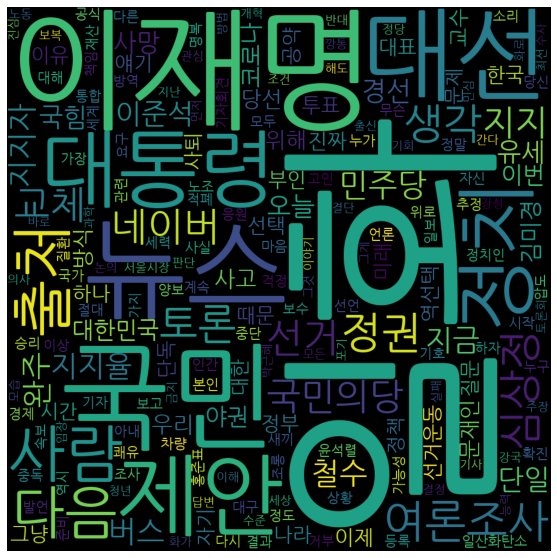

{'안철수': 17019, '윤석열': 4310, '후보': 3816, '일화': 2792, '이재명': 2710, '뉴스': 1747, '국민': 1664, '대선': 1560, '이준석': 1445, '사람': 1347, '대통령': 1263, '정치': 1244, '토론': 1106, '출처': 1031, '심상정': 989, '다음': 921, '정권': 882, '교체': 882, '생각': 801, '선거': 710, '네이버': 708, '국민의당': 684, '지지': 649, '완주': 644, '제안': 579, '민주당': 557, '오늘': 553, '지금': 513, '선언': 506, '이번': 496, '결렬': 489, '국힘': 480, '지지자': 469, '대한민국': 441, '지지율': 436, '경제': 426, '단일': 420, '우리': 417, '나라': 416, '대표': 403, '이제': 395, '철수': 384, '진짜': 378, '투표': 370, '답변': 357, '당선': 339, '공약': 331, '문재인': 329, '사퇴': 324, '책임': 323, '조롱': 322, '절레절레': 319, '위해': 303, '그냥': 300, '고인': 299, '발언': 296, '유세': 291, '대한': 287, '보고': 284, '여론조사': 280, '김미경': 278, '하나': 278, '자기': 275, '때문': 270, '사고': 267, '미래': 259, '합당': 258, '새끼': 257, '가장': 250, '질문': 249, '이유': 248, '교수': 247, '버스': 247, '얘기': 246, '기호': 246, '부산': 246, '시간': 239, '정치인': 236, '철회': 232, '선택': 231, '다시': 230, '데이터': 229, '기자회견': 228, '도리': 227, '정책': 224, '정도': 220, '인간': 218, '소리

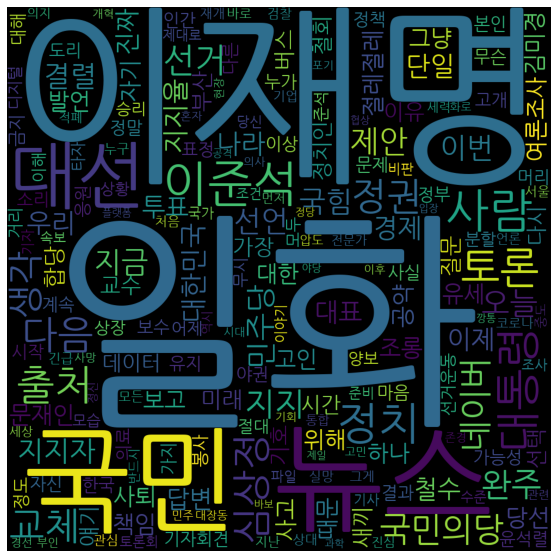

{'안철수': 17651, '윤석열': 4946, '일화': 3866, '후보': 3070, '이재명': 2657, '국민': 2023, '정치': 1948, '사람': 1484, '뉴스': 1344, '대선': 1299, '철수': 1222, '정권': 1199, '지지': 1182, '교체': 1127, '대통령': 1010, '출처': 947, '생각': 923, '민주당': 733, '선거': 731, '지지자': 721, '다음': 720, '진짜': 675, '이준석': 642, '투표': 641, '심상정': 616, '네이버': 602, '이제': 599, '이번': 592, '토론': 570, '결렬': 562, '지금': 559, '단일': 546, '오늘': 507, '국민의당': 490, '국힘': 460, '합의': 451, '완주': 447, '협상': 423, '대한민국': 407, '보고': 397, '지지율': 395, '문재인': 394, '사퇴': 393, '나라': 387, '인간': 382, '위해': 382, '자기': 377, '새끼': 375, '당선': 366, '선언': 358, '여론조사': 356, '정부': 355, '정치인': 353, '파일': 347, '우리': 344, '하나': 341, '이유': 314, '전격': 307, '그냥': 303, '제안': 295, '정말': 294, '통합': 294, '철회': 293, '공동': 285, '연설': 283, '때문': 277, '기자회견': 273, '이태규': 268, '조건': 262, '선택': 261, '본인': 259, '미래': 259, '책임': 257, '사실': 251, '보수': 247, '개혁': 246, '당신': 246, '한국': 245, '자신': 241, '경선': 241, '단독': 241, '공개': 238, '합당': 237, '역시': 230, '손가락': 227, '무슨': 226, '유세': 226, '문제'

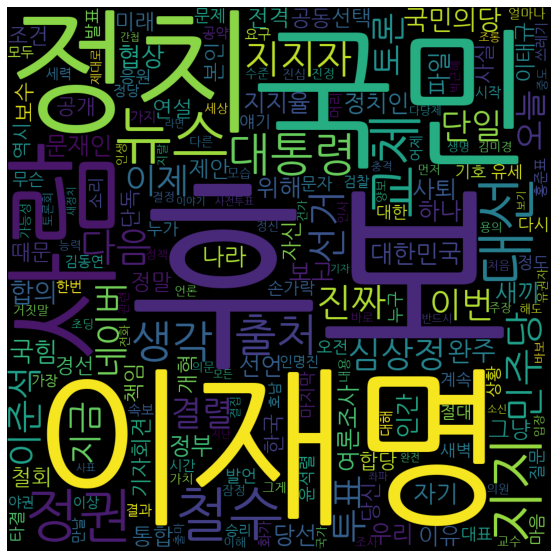

{'안철수': 16568, '윤석열': 3984, '일화': 2900, '이재명': 2165, '국민': 2085, '정치': 1877, '후보': 1780, '사람': 1471, '철수': 1359, '지지자': 1333, '투표': 1242, '지지': 1153, '사퇴': 1124, '생각': 1118, '뉴스': 1101, '대선': 1064, '이준석': 988, '정권': 868, '대표': 813, '교체': 766, '다음': 752, '이번': 722, '선거': 705, '출처': 696, '진짜': 688, '대통령': 647, '민주당': 629, '유세': 589, '심상정': 556, '국힘': 535, '단일': 526, '손가락': 508, '국민의당': 476, '위해': 470, '당선': 470, '지금': 458, '이제': 457, '때문': 428, '사전투표': 421, '배신': 417, '우리': 413, '대한민국': 409, '야합': 358, '새끼': 356, '정치인': 354, '네이버': 330, '합당': 330, '개혁': 329, '보고': 322, '미래': 319, '하루': 319, '그냥': 318, '정부': 318, '나라': 314, '당신': 300, '정말': 295, '문재인': 295, '마음': 292, '이유': 281, '선언': 280, '완주': 278, '협박': 278, '선택': 275, '자기': 274, '당원': 274, '검찰': 271, '호남': 260, '결과': 255, '하나': 251, '역풍': 246, '다당제': 246, '대한': 243, '인간': 234, '절대': 230, '자신': 227, '무슨': 226, '오늘': 226, '공동': 224, '본인': 222, '통합': 219, '토론': 216, '다시': 213, '유권자': 213, '결정': 206, '계속': 205, '정도': 204, '압도': 201, '승리':

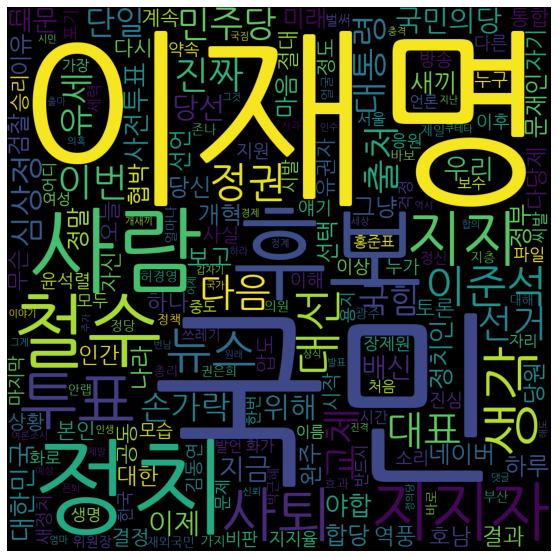

In [11]:
date_week(ahn)
wc(ahn[ahn.week == 1])
wc(ahn[ahn.week == 2])
wc(ahn[ahn.week == 3])
wc(ahn[ahn.week == 4])

### 스마일게이트

In [ ]:
w = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_여성가족.csv')
m = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_남성.csv')
myth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_종교.csv')
region = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/ahn_지역.csv')

In [ ]:
w

,Unnamed: 0,text,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
0,13,이재명은 윤석열 안철수 심상정과 싸웠다 잘했다 극좌와 극우는 통한다고 굿짐당과 정의...,0.91,0.01,0.02,0.04,0.02,0.03,0.02,0.10,0.05,0.10
1,19,허경영냅두고 왜 심상정팸 안철수냅두고 왜 심상정팸 맨날 여권여권거리는 친구들 결국 ...,0.76,0.02,0.01,0.04,0.02,0.02,0.01,0.08,0.22,0.06
2,133,씻는데 계속 한숨나옴 지금도 나옴 대체 공약도 없고 아는것도 없어서 안철수가 고개저...,0.70,0.01,0.01,0.03,0.01,0.01,0.01,0.04,0.18,0.14
3,379,윤석열 제20대 대통령 당선으로 바뀔 것들 여가부 폐지 안철수 총리 미지수 확실한 ...,0.79,0.01,0.02,0.05,0.01,0.02,0.01,0.07,0.06,0.18
4,513,트렌드 윤석열 대통령 취임일과 지방선거 안철수 인수위에서 여가부폐지 나올까,0.82,0.01,0.02,0.04,0.01,0.02,0.01,0.04,0.05,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...
79,54798,안철수 카메라 각도 좀 이상한거 아님 혼 드워프 같아 보여,0.74,0.01,0.01,0.03,0.01,0.02,0.01,0.04,0.13,0.16
80,54959,오늘 토론은 심상정은 국힘당 2중대 안철수는 민주당 2중대 ㅋㅋㅋㅋ,0.80,0.02,0.01,0.04,0.01,0.02,0.01,0.03,0.14,0.18
81,54969,아 ㅋㅋㅋㅋㅋ 금속노조사무처장 출신 심상정씨 스타트업 안대표 안철수한테 강성노조의 ...,0.88,0.02,0.01,0.03,0.01,0.02,0.01,0.03,0.15,0.09
82,55673,대통령 후보 호감도 안철수 37 윤석열 34 이재명 34 심상정 30,0.78,0.02,0.03,0.02,0.01,0.01,0.01,0.04,0.15,0.14


{'안철수': 101, '윤석열': 29, '후보': 20, '심상정': 14, '정치': 14, '이재명': 13, '이준석': 12, '대통령': 10, '일화': 10, '국민': 9, '정권': 9, '뉴스': 8, '민주당': 7, '생각': 7, '단일': 7, '교체': 7, '페미': 6, '토론': 6, '사람': 6, '투표': 6, '대선': 6, '지금': 5, '지지자': 5, '때문': 5, '문제': 5, '출처': 5, '응원': 5, '혐오': 4, '여자': 4, '당선': 4, '손가락': 4, '국힘': 4, '갈등': 4, '지지': 4, '대표': 4, '인생': 4, '자기': 4, '선거': 4, '남녀': 3, '여가부': 3, '폐지': 3, '완주': 3, '먼저': 3, '압도': 3, '진짜': 3, '거기': 3, '사퇴': 3, '철수': 3, '산이': 3, '자신': 3, '한번': 3, '부정선거': 3, '대한': 3, '책임감': 3, '집단': 3, '문재인': 3, '고인': 3, '중대': 3, '공당': 3, '정의당': 2, '지향': 2, '여권': 2, '친구': 2, '빌런': 2, '여니': 2, '온갖': 2, '남탓': 2, '화가': 2, '지랄': 2, '누구': 2, '여성부': 2, '해결': 2, '페미니즘': 2, '가지': 2, '이미지': 2, '지역': 2, '소수': 2, '주변': 2, '남자': 2, '절대': 2, '간다': 2, '발언': 2, '정말': 2, '이제': 2, '검찰': 2, '쿠테타': 2, '야합': 2, '궁금': 2, '오늘': 2, '새끼': 2, '선거운동': 2, '결과': 2, '답변': 2, '신념': 2, '승리': 2, '모습': 2, '교수': 2, '상식': 2, '기반': 2, '이번': 2, '얘기': 2, '파일': 2, '인터뷰': 2, '기억': 2, '걸음': 2, '개혁': 2, '다당제': 2, '새

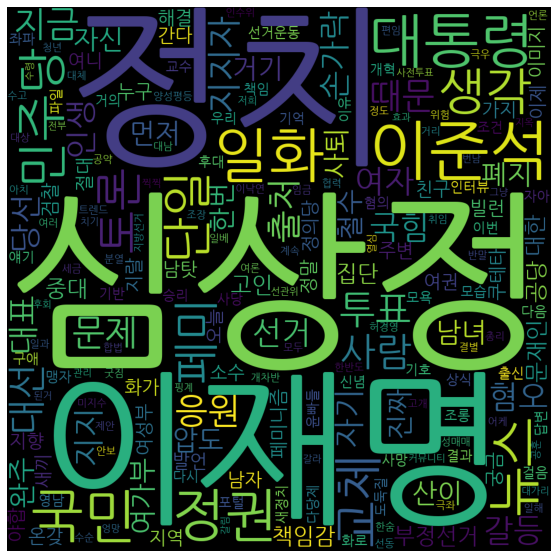

In [ ]:
wc(w)

{'안철수': 60, '윤석열': 19, '일화': 11, '이재명': 11, '철수': 11, '뉴스': 8, '이번': 7, '민주당': 6, '국민': 6, '출처': 5, '사람': 5, '지금': 5, '후보': 5, '누가': 4, '번남': 4, '지지': 4, '심상정': 4, '선거': 4, '생각': 4, '집단': 4, '이준석': 4, '다음': 4, '그냥': 4, '네이버': 4, '지지율': 4, '대통령': 4, '처벌': 4, '한남': 3, '정신': 3, '마음': 3, '하나': 3, '이제': 3, '확인': 3, '인간': 3, '경선': 3, '투표': 3, '정치': 3, '대구': 3, '가능': 3, '시간': 2, '신경': 2, '새끼': 2, '원래': 2, '사퇴': 2, '대체': 2, '우리': 2, '남성': 2, '합류': 2, '비리': 2, '가지': 2, '야합': 2, '부정선거': 2, '대선': 2, '희롱': 2, '중간': 2, '초딩': 2, '문제': 2, '개인': 2, '동행': 2, '손가락': 2, '합동': 2, '유세': 2, '변명': 2, '그것': 2, '생중계': 2, '보고': 2, '지대': 2, '단독': 2, '오늘': 2, '유권자': 2, '당선': 2, '인명진': 2, '요구': 2, '문재인': 2, '사상': 2, '불가능': 2, '보수': 2, '진영': 2, '중대': 2, '재해': 2, '발언': 2, '징징': 2, '절레절레': 2, '승리': 2, '대장동': 2, '태생': 2, '저쪽': 2, '어쩌': 2, '나라': 2, '운동': 2, '본부': 2, '판단': 2, '벌금': 2, '과거': 2, '그게': 2, '한마디': 2, '어디': 2, '정말': 1, '국가': 1, '이건': 1, '최악': 1, '존나': 1, '여성': 1, '정책': 1, '시전': 1, '분산': 1, '소리': 1, '무시': 1, '

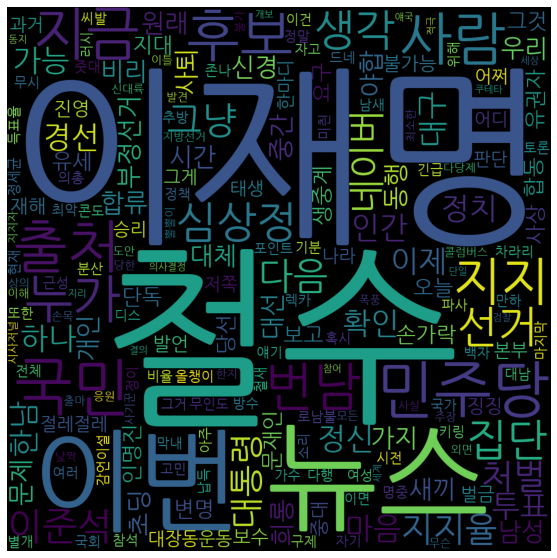

In [ ]:
wc(m)

{'안철수': 51, '윤석열': 20, '국민': 14, '일화': 13, '이재명': 12, '후보': 11, '사람': 9, '정권': 8, '교체': 7, '대선': 7, '분할': 7, '상장': 7, '금지': 7, '지역구': 6, '득표수': 6, '민주당': 6, '지지자': 6, '심상정': 6, '이준석': 6, '미래': 5, '절대': 5, '지지': 5, '지향': 4, '압도': 4, '조작': 4, '하나': 4, '공약': 4, '출처': 4, '당일': 3, '관내': 3, '사전투표': 3, '결과': 3, '수치': 3, '홍준표': 3, '대통령': 3, '뉴스': 3, '이제': 3, '토론': 3, '네이버': 3, '박근혜': 3, '하나님': 2, '제사': 2, '거짓말': 2, '단일': 2, '선택': 2, '마누라': 2, '이미지': 2, '죄명': 2, '정치': 2, '자리': 2, '선언': 2, '사퇴': 2, '교수': 2, '정치인': 2, '국가책임': 2, '국가': 2, '일자리': 2, '건강': 2, '나라': 2, '한국': 2, '생각': 2, '인간': 2, '그릇': 2, '선거': 2, '능력': 2, '강국': 2, '국민의당': 2, '다른': 2, '마음': 2, '글자': 2, '협상': 2, '일보': 2, '철수': 2, '오늘': 2, '양보': 2, '호감': 2, '지지율': 2, '이해': 2, '안일': 2, '포기': 2, '공유': 2, '슈시': 2, '병신': 2, '서울': 2, '엄마': 2, '진짜': 2, '자녀': 1, '예수': 1, '가짜': 1, '신자': 1, '먹듯': 1, '완전': 1, '실망': 1, '탈당': 1, '기부': 1, '동그라미': 1, '재단': 1, '이명박': 1, '청계재단': 1, '짝퉁': 1, '나가야': 1, '세금': 1, '이상': 1, '청년': 1, '경선': 1, '탈락': 1, '차선': 1

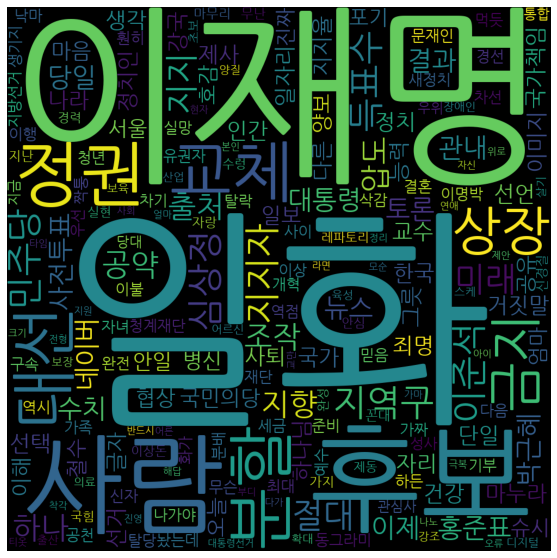

In [ ]:
wc(myth)

{'안철수': 378, '윤석열': 105, '일화': 79, '이재명': 53, '후보': 52, '뉴스': 45, '정치': 42, '사람': 37, '국민': 36, '민주당': 26, '다음': 26, '호남': 25, '대선': 25, '선거': 22, '대통령': 22, '출처': 22, '정권': 22, '교체': 21, '철수': 21, '전라도': 20, '투표': 19, '지지': 19, '이준석': 18, '진짜': 18, '지금': 16, '지지자': 16, '네이버': 16, '문재인': 15, '심상정': 15, '국민의당': 14, '이번': 13, '국힘': 13, '위해': 13, '생각': 12, '사퇴': 12, '광주': 11, '당선': 11, '나라': 11, '유세': 11, '제안': 11, '우리': 10, '합당': 10, '정치인': 9, '이유': 9, '그냥': 9, '정부': 9, '완주': 9, '대한민국': 9, '오늘': 9, '때문': 8, '지역': 8, '당원': 8, '본인': 8, '선택': 8, '무슨': 8, '보고': 8, '경선': 8, '서울': 7, '당신': 7, '이후': 7, '정신': 7, '지지율': 7, '문제': 7, '동지': 7, '모두': 7, '한국': 7, '책임': 7, '경상도': 6, '걱정': 6, '제대로': 6, '이제': 6, '정도': 6, '단일': 6, '충격': 6, '마음': 6, '대해': 6, '비판': 6, '시작': 6, '토론': 6, '어제': 6, '미래': 6, '언론': 5, '아무': 5, '선거운동': 5, '기억': 5, '새끼': 5, '소리': 5, '중심': 5, '정책': 5, '절대': 5, '야합': 5, '대표': 5, '역풍': 5, '인천': 5, '양보': 5, '선언': 5, '손가락': 5, '교수': 5, '약속': 5, '결정': 5, '적폐': 5, '공약': 5, '결렬': 5, '여론조사'

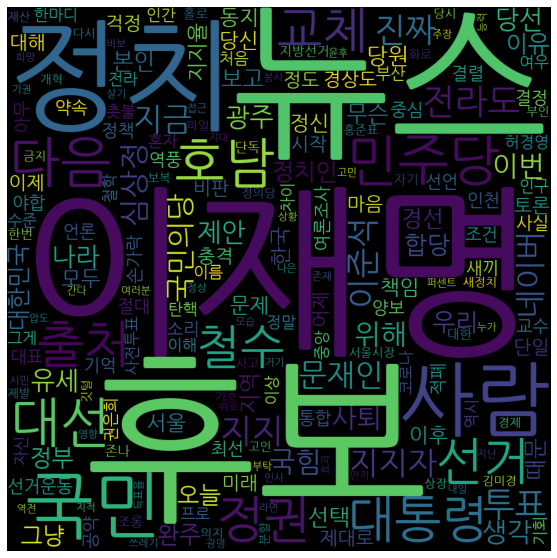

In [ ]:
wc(region)

## 일자별 언급 단어

In [ ]:
# tokenizing
# stopwords list
# 한국불용어100.txt와 불용어 추가 단어는 1차 분석에 있어요
stop_words = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle/president election/data/한국어불용어100.txt',
                         sep = "\t", engine='python', header = None)
stop_words = list(stop_words[0])

mecab = Mecab()

def preprocessing_mecab(sentence):
    #### Tokenize
    morphs = mecab.pos(str(sentence))
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [ ]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

In [ ]:
number['tokenized'] = number['Text'].apply(lambda x: preprocessing_mecab(x))
number['tokenized'] = number['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

number['date'] = pd.to_datetime(number['Datetime']).apply(lambda x: x.date())
number['date_re'] = number['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

number = number.sort_values(by = 'date_re')

In [ ]:
for i in range(len(fire)):
    if '추적' in fire.tokenized[i]:
        fire.tokenized[i].remove('추적')
    if '불꽃' in fire.tokenized[i]:
        fire.tokenized[i].remove('불꽃')
    if '단불' in fire.tokenized[i]:
        fire.tokenized[i].remove('단불')

In [ ]:
def add_value_labels(ax, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(df['word'][idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)

# 날짜별 가장 많이 언급된 단어와 단어의 갯수를 dict형태로 가져와서 dataframe으로 만들어주는 과정
date = []
word_list = []
count_list = []

for i in ahn['date_re'].unique():
    tokenizing = sum(ahn[ahn['date_re'] == i]['tokenized'],[])
    # 첫 번째 단어는 제거 (안철수, 박지현)
    c, cw = common_words(tokenizing, 2)    
    word = cw[1][0]
    count = cw[1][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

# graph
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(data = df, x = 'date', y = 'count')
add_value_labels(ax)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date")

## 해시태그

In [ ]:
park.Text.replace('#',' #', regex=True, inplace=True)
park.Text.replace(',','  ', regex=True, inplace=True)

In [ ]:
Texts = park[park['Text'].str.contains('#') == True]
Texts['Text'] = Texts['Text'].str.split()

word_of_Bag = sum(Texts['Text'], [])
word_of_Bag = [word for word in word_of_Bag if word.startswith('#') != False]
word_of_Bag = [word for word in word_of_Bag if not (len(word) == 0)]

In [ ]:
set_wob = set(word_of_Bag)
list_wob = list(set_wob)
key = list_wob
value = [word_of_Bag.count(i) for i in list_wob]
data = pd.DataFrame({'key':key, 'value':value})
data = data[data['value'] > 1]

In [ ]:
data = data.sort_values(by = 'value')

In [ ]:
# 안철수
data.drop(data[data.key == '#'].index, inplace = True)

In [ ]:
# 박지현
data.drop(index = [167, 102, 62], inplace = True)

In [ ]:
# 추적단 불꽃
data.drop(index = [22, 23, 19, 7], inplace = True)

No handles with labels found to put in legend.


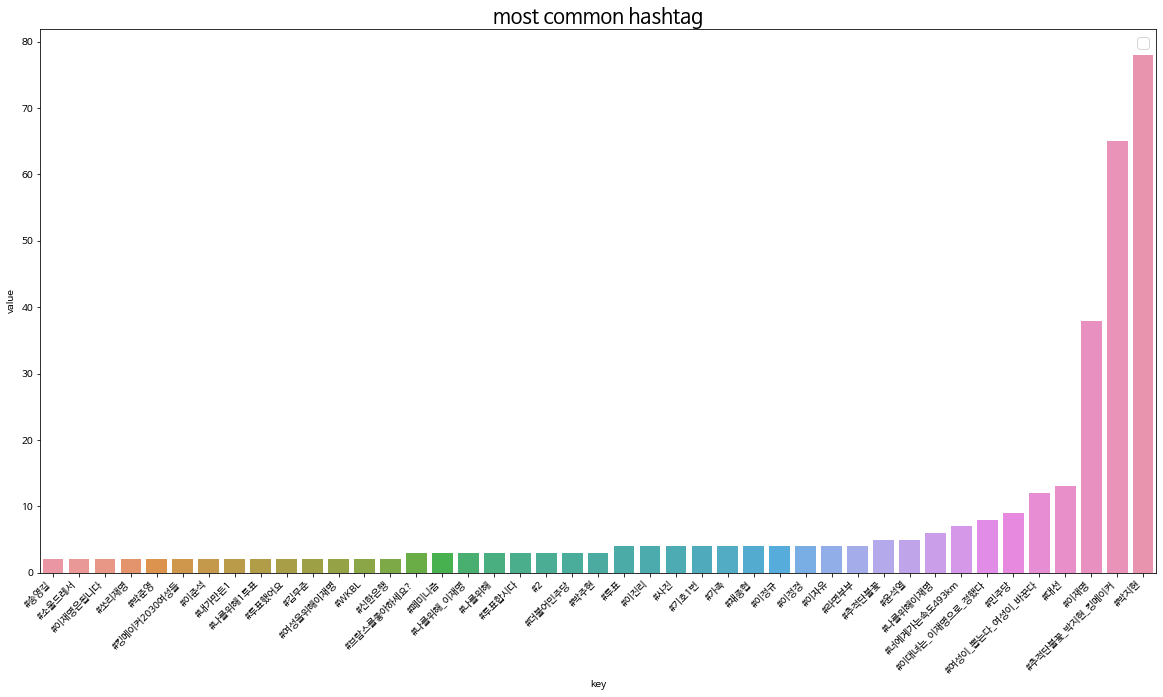

In [ ]:
plt.figure(figsize=(20, 10))
plot = sns.barplot(data['key'], data['value'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)